In [1]:
import numpy as np

result = -(10/16 * np.log2(10/16) + 6/16 * np.log2(6/16))

print(result)

0.954434002924965


In [2]:
import numpy as np

result1 = 8/16 * (-(7/8 * np.log2(7/8) + 1/8 * np.log2(1/8)))
result2 = 8/16 * (-(3/8 * np.log2(3/8) + 5/8 * np.log2(5/8)))

print(result1 + result2)

0.7489992230622807


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


/Users/admin/opt/anaconda3/envs/data_env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,label,height,weight
0,1,188,71
1,2,161,68
2,0,178,52
3,2,136,63
4,1,145,52
...,...,...,...
19995,0,163,48
19996,2,139,70
19997,1,150,48
19998,1,189,69


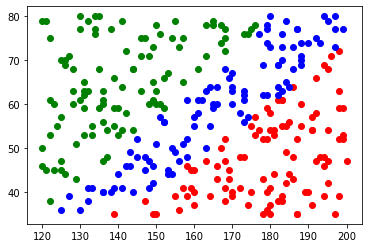

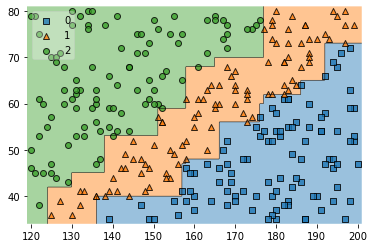

In [1]:
# MNIST
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# training data set
df = pd.read_csv('./data/bmi.csv', skiprows =3)
display(df)

x_data = df.iloc[:,1:].values # 2차원 형태의 numpy
t_data = df.iloc[:,0].values

x_scaler = MinMaxScaler()
x_scaler.fit(x_data)
x_data = x_scaler.transform(x_data)


# matplotlib을 이용해서 t_data가 0인경우 red, 1인경우 blue, 2인경우 green으로 표현
# 총 2만개 중에 각각 30개씩만 뽑아서그래프를 그려보아요
num_sample = 100
df_0 = df[df['label'] ==0].head(num_sample)
plt.scatter(df_0.iloc[:,1], df_0.iloc[:,2], color = 'r')

df_1 = df[df['label'] ==1].head(num_sample)
plt.scatter(df_1.iloc[:,1], df_1.iloc[:,2], color = 'b')

df_2 = df[df['label'] ==2].head(num_sample)
plt.scatter(df_2.iloc[:,1], df_2.iloc[:,2], color = 'g')

plt.show()
# plt.show()
x_data_sample = np.concatenate((df_0.iloc[:,1:3],df_1.iloc[:,1:3],df_2.iloc[:,1:3]),axis = 0)
t_data_sample = np.concatenate((df_0.iloc[:,0],df_1.iloc[:,0],df_2.iloc[:,0]),axis = 0)

#sklearn 구현
model = DecisionTreeClassifier()
model.fit(x_data_sample, t_data_sample) 

# print(model.support_vectors_)
plot_decision_regions(X=x_data_sample, 
                      y=t_data_sample, 
                      clf = model,
                     legend=2)
plt.show()





In [3]:
%reset
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.model_selection import train_test_split # train, test 데이터분리
from sklearn.model_selection import KFold # cross validation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier




df = pd.read_csv('/Users/admin/Downloads/Digit_Recognizer_train.csv')

display(df)

# 결측치 확인
# print(df.isnull().sum())
x_data = df.iloc[:,1:]
t_data = df['label']

# Data split
x_data_train, x_data_test, t_data_train, t_data_test=\
train_test_split(x_data,t_data,test_size = 0.3, random_state = 0)

# 데이터 정규화 (Normalization)
x_scaler = MinMaxScaler()
x_scaler.fit(x_data_train)
x_data_train_norm = x_scaler.transform(x_data_train)
x_data_test_norm = x_scaler.transform(x_data_test)


# depth는 label의 종류 개수 # spots

t_data_train_onehot = tf.one_hot(t_data_train, depth=10)
t_data_test_onehot = tf.one_hot(t_data_test, depth=10)
# t_data_train = np.array(t_data_train)
# t_data_test = np.array(t_data_test)


# TF 2.0 구현 
svn_model = DecisionTreeClassifier()
svn_model.fit(x_data_train_norm, t_data_train)
result = svn_model.predict(x_data_test_norm)
print(classification_report(t_data_test, result))


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1242
           1       0.94      0.94      0.94      1429
           2       0.82      0.80      0.81      1276
           3       0.80      0.81      0.81      1298
           4       0.85      0.84      0.85      1236
           5       0.77      0.79      0.78      1119
           6       0.87      0.88      0.87      1243
           7       0.88      0.87      0.88      1334
           8       0.80      0.76      0.78      1204
           9       0.80      0.83      0.81      1219

    accuracy                           0.85     12600
   macro avg       0.84      0.84      0.84     12600
weighted avg       0.85      0.85      0.85     12600

